In [1]:
import os
import pandas as pd
import glob
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import pdb
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes #hold



In [2]:
####################################################
## import the experimental values
# set paths
repobasedir = os.getcwd()
experimentalfile = os.path.join(repobasedir, 'experimentalMetabolics_all.csv')
# read in the file to dataframe
expmetcost_df = pd.read_csv(experimentalfile)
print(expmetcost_df)
# print(expmetcost)
# f, ax = plt.subplots()
# expmetcost.plot(x="experiment [pi]",y="cost [W/kg]",title="plot of all exp costs",ax=ax)
# expmetcost_df.plot(y="metabolics_all_avg",title="plot of all exp costs",ax=ax, marker='o', alpha=0.7)
# plt.show()
# import pdb
# pdb.set_trace()



     metabolics_all_avg subjectname     condname experimentname trialname
0              5.067015     wals024    walsslack          walsh   trial01
1              4.214548     wals077    walsslack          walsh   trial01
2              4.290595     wals088    walsslack          walsh   trial01
3              5.698502     wals112    walsslack          walsh   trial01
4              4.382331     wals127    walsslack          walsh   trial01
..                  ...         ...          ...            ...       ...
662           10.361830     sild035  sild10wrun0         silder   trial01
663            2.904840     sild035     sild20w0         silder   trial01
664           11.630630     sild035  sild20wrun0         silder   trial01
665            3.954340     sild035     sild30w0         silder   trial01
666           12.044730     sild035  sild30wrun0         silder   trial01

[667 rows x 5 columns]


In [3]:
## import all of the simulation results
# set all the paths
simresultspath = os.path.join(repobasedir,'..\\metabolicsResults\\')
# muscleinversepath = os.path.join(simresultspath,'muscleInverse\\')
muscleinversepath = os.path.join(simresultspath,'muscleInverse_100con\\')
muscleInverseWithEMGpath = os.path.join(simresultspath,'muscleInverseWithEMG\\')

## first handle the values in the regular muscle driven inverse problem
# get all the filenames
musclefiles = glob.glob(os.path.join(muscleinversepath,'*.csv'))
# load them all into a single dataframe
df_from_each_file = (pd.read_csv(f) for f in musclefiles)
# print(df_from_each_file)
muscle_df = pd.concat(df_from_each_file, ignore_index=True)
muscle_df

,Row,metabolics_all_avg,metabolics_act_avg,metabolics_short_avg,metabolics_basal_avg,metabolics_mech_avg,metabolics_gas_avg,metabolics_sol_avg,metabolics_bifemlh_avg,metabolics_recfem_avg,metabolics_swing_avg,metabolics_stance_avg,model_mass,subjectname,condname,experimentname,trialname
0,trial,13.449687,6.405999,7.431584,1.2,-1.587896,96.861613,104.292272,60.020656,107.377371,4.780602,8.380498,73.48,welk005,welknatural,welk,trial01
1,trial,14.096317,6.294604,7.084216,1.2,-0.482504,2.876931,0.411462,2.123792,1.282453,4.494978,9.567318,57.61,welk013,welknatural,welk,trial02
2,trial,12.094970,5.421487,5.675439,1.2,-0.201956,3.400211,5.720656,4.421526,1.443104,4.359551,6.990719,57.61,welk013,welkexo,welk,trial04
3,trial,10.370537,4.595540,4.965821,1.2,-0.390824,0.000000,0.000000,0.000000,0.000000,3.579710,6.240360,53.98,welk009,welkexo,welk,trial02
4,trial,14.656024,6.474340,7.534893,1.2,-0.553210,169.442368,66.970388,40.557209,517.361706,4.875136,9.714081,57.61,welk013,welknatural,welk,trial04
5,trial,13.440067,5.942885,6.733515,1.2,-0.436333,2.444679,5.614711,3.551176,1.609693,4.313007,9.001343,57.61,welk013,welknatural,welk,trial03
6,trial,12.258589,5.442225,5.753043,1.2,-0.136680,3.207700,5.549144,4.233213,1.377500,4.240623,7.643558,57.61,welk013,welkexo,welk,trial02
7,trial,11.833764,5.274352,5.989101,1.2,-0.629688,0.000000,0.000000,0.000000,0.000000,4.266420,6.933608,53.98,welk009,welkexo,welk,trial03
8,trial,11.869099,5.292477,5.904414,1.2,-0.527791,7.859541,5.041929,-0.617000,1.270527,4.080182,7.243977,53.98,welk009,welkexo,welk,trial04
9,trial,12.475568,5.537341,6.042720,1.2,-0.304493,4.626411,5.968487,2.593662,1.481946,4.237600,7.672655,57.61,welk013,welkexo,welk,trial01


In [4]:

# get the full metabolics dataframe
# test_df = muscle_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_all_avg':['mean']})
test_df = muscle_df.groupby(['subjectname','condname']).agg({'metabolics_all_avg':['mean']})
test_df.columns = ['metabolics_all_avg_mean']
test_df = test_df.reset_index()
print('test_df: full metabolics df')
print(test_df)

# get the swing metabolics dataframe
# swing_df = muscle_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_swing_avg':['mean']})
swing_df = muscle_df.groupby(['subjectname','condname']).agg({'metabolics_swing_avg':['mean']})
swing_df.columns = ['metabolics_swing_avg_mean']
swing_df = swing_df.reset_index()
print('swing_df')
print(swing_df)
# get the stance metabolics dataframe
# stance_df = muscle_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_stance_avg':['mean']})
stance_df = muscle_df.groupby(['subjectname','condname']).agg({'metabolics_stance_avg':['mean']})
stance_df.columns = ['metabolics_stance_avg_mean']
stance_df = stance_df.reset_index()
print('stance_df')
print(stance_df)


test_df: full metabolics df
   subjectname     condname  metabolics_all_avg_mean
0      welk002      welkexo                11.785021
1      welk002  welknatural                13.087411
2      welk003      welkexo                11.460293
3      welk003  welknatural                12.152587
4      welk005      welkexo                10.002864
5      welk005  welknatural                12.162692
6      welk008      welkexo                10.664187
7      welk008  welknatural                11.456770
8      welk009      welkexo                11.311614
9      welk009  welknatural                12.780257
10     welk010      welkexo                12.551311
11     welk010  welknatural                13.602145
12     welk013      welkexo                12.134422
13     welk013  welknatural                14.519905
swing_df
   subjectname     condname  metabolics_swing_avg_mean
0      welk002      welkexo                   3.271432
1      welk002  welknatural                   3.360173
2  

In [5]:

# get the experimental metabolics dataset in the same form - averaged across subject conditions and trials. 

# exp_df = expmetcost_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_all_avg':['mean']})
# exp_df.columns = ['metabolics_all_avg_mean']
# exp_df = exp_df.reset_index()
# print('exp_df')
# print(exp_df)

# try to average across the gait cycles. 
exp_df2 = expmetcost_df.groupby(['subjectname','condname']).agg({'metabolics_all_avg':['mean']})
exp_df2.columns = ['metabolics_all_avg_mean']
exp_df2 = exp_df2.reset_index()
exp_df = exp_df2
print('exp_df')
print(exp_df)

exp_df
    subjectname           condname  metabolics_all_avg_mean
0       demb005     dembloadedfree                 6.040289
1       demb005  dembloadedmatched                 6.281147
2       demb005     dembnoloadfree                 4.682754
3       demb005     dembnoloadslow                 4.152233
4       demb007     dembloadedfree                 6.282373
..          ...                ...                      ...
472     welk010        welknatural                12.297055
473     welk011            welkexo                 9.901415
474     welk011        welknatural                 8.467083
475     welk013            welkexo                10.117616
476     welk013        welknatural                10.937716

[477 rows x 3 columns]


In [6]:

# trials included
# both_df = pd.merge(test_df, exp_df, how='right', on=['subjectname','condname','trialname'])
# averaged on trials too
both_df = pd.merge(test_df, exp_df, how='right', on=['subjectname','condname'])
pd.set_option('display.max_rows',None) #,'display.max_columns',None)

bothtrim_df = both_df.dropna()
bothtrim_df


,subjectname,condname,metabolics_all_avg_mean_x,metabolics_all_avg_mean_y
439,welk002,welkexo,11.785021,8.972911
443,welk002,welknatural,13.087411,9.390569
447,welk003,welkexo,11.460293,9.520653
451,welk003,welknatural,12.152587,9.829316
463,welk005,welkexo,10.002864,9.428405
464,welk005,welknatural,12.162692,10.921895
467,welk008,welkexo,10.664187,9.355703
468,welk008,welknatural,11.456770,10.287595
469,welk009,welkexo,11.311614,9.815938
470,welk009,welknatural,12.780257,11.109626


In [7]:
### going to make a print out of the actual reductions for swing and stance, as well as percent 
# grab the raw differences between them
stance_means = stance_df.groupby(['condname']).agg({'metabolics_stance_avg_mean':['mean']})
swing_means = swing_df.groupby(['condname']).agg({'metabolics_swing_avg_mean':['mean']})

print(stance_means)
print(swing_means)

# get all the values in a workable format
swings_exo = swing_df.loc[swing_df['condname'] == 'welkexo']
swings_natural = swing_df.loc[swing_df['condname'] == 'welknatural']
stances_exo = stance_df.loc[stance_df['condname'] == 'welkexo']
stances_natural = stance_df.loc[stance_df['condname'] == 'welknatural']

# get the average raw differences for both stance and swing - check with above
stance_change = np.mean(stances_exo) - np.mean(stances_natural)
swing_change = np.mean(swings_exo) - np.mean(swings_natural)

# need to figure out how I want to do the percents - change scaled by whole body, or by split costs??
# I think it might be best to do it with respect to the full body cost - keeps it comparable

# now to get the percent changes for stance and swing
stance_perc_change = (np.mean(stances_exo) - np.mean(stances_natural)) / np.sum([np.mean(stances_natural), np.mean(swings_natural)]) * 100
swing_perc_change = (np.mean(swings_exo) - np.mean(swings_natural)) / np.sum([np.mean(stances_natural), np.mean(swings_natural)]) * 100

# stance_perc_change


print("Raw stance difference: %f" % stance_change)
print('Raw swing  difference: %f' % swing_change)
print('Percent Difference stance: %f' % stance_perc_change)
print('Percent Difference swing: %f' % swing_perc_change)



            metabolics_stance_avg_mean
                                  mean
condname                              
welkexo                       7.309555
welknatural                   8.813814
            metabolics_swing_avg_mean
                                 mean
condname                             
welkexo                      3.603352
welknatural                  3.898940
Raw stance difference: -1.504258
Raw swing  difference: -0.295587
Percent Difference stance: -11.832670
Percent Difference swing: -2.325125


In [8]:
print(np.sum([np.mean(stances_natural), np.mean(swings_natural)]))
print((np.mean(stances_exo) - np.mean(stances_natural)))


# print(swings_natural)
# print(swings_exo)


# print(stances_natural)
# print(stances_exo)

12.712753179817016
metabolics_stance_avg_mean   -1.504258
dtype: float64


In [9]:
stances_natural

,subjectname,condname,metabolics_stance_avg_mean
1,welk002,welknatural,9.461884
3,welk003,welknatural,8.316323
5,welk005,welknatural,7.675539
7,welk008,welknatural,7.593565
9,welk009,welknatural,8.303889
11,welk010,welknatural,10.547504
13,welk013,welknatural,9.797990


In [10]:
stances_exo

,subjectname,condname,metabolics_stance_avg_mean
0,welk002,welkexo,7.901537
2,welk003,welkexo,7.281104
4,welk005,welkexo,6.092534
6,welk008,welkexo,6.311269
8,welk009,welkexo,6.825258
10,welk010,welkexo,9.468740
12,welk013,welkexo,7.286447


In [11]:
swings_natural

,subjectname,condname,metabolics_swing_avg_mean
1,welk002,welknatural,3.360173
3,welk003,welknatural,3.561437
5,welk005,welknatural,4.127728
7,welk008,welknatural,3.352854
9,welk009,welknatural,4.256651
11,welk010,welknatural,3.923210
13,welk013,welknatural,4.710525


In [12]:
swings_exo

,subjectname,condname,metabolics_swing_avg_mean
0,welk002,welkexo,3.271432
2,welk003,welkexo,3.469623
4,welk005,welkexo,3.289909
6,welk008,welkexo,3.389188
8,welk009,welkexo,3.910336
10,welk010,welkexo,3.638481
12,welk013,welkexo,4.254498


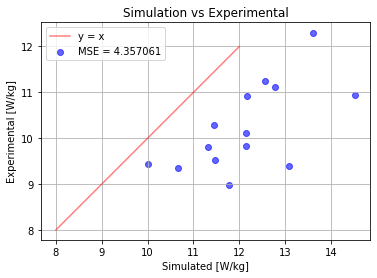

In [13]:

# make a figure for the simulations vs exp
f, ax = plt.subplots()
tempx = bothtrim_df['metabolics_all_avg_mean_x']
tempy = bothtrim_df['metabolics_all_avg_mean_y']
mse = mean_squared_error(tempy, tempx)
ax.scatter(tempx, tempy, marker='o', alpha=0.6, c='blue', label='MSE = %f'%mse)
# line = mlines.Line2D([0,1], [0,1], color='red')
# transform = ax.transAxes
# line.set_transform(transform)
# ax.add_line(line)
unitx = np.linspace(8,12,100)
ax.plot(unitx,unitx,color='red',alpha=0.5, label='y = x')
# some nice 
ax.set_title('Simulation vs Experimental')
# plt.xlim([8, 13])
# plt.ylim([8, 13])
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlabel('Simulated [W/kg]')
plt.ylabel('Experimental [W/kg]')
plt.legend()
# plt.show()

In [14]:
# make a figure for exo vs natural stance and swing
# thinking box plots
# pdb.set_trace()

swingexo = np.array([])
swingnatural = np.array([])
stanceexo = np.array([])
stancenatural = np.array([])

# split the swings up
for i, row in swing_df.iterrows():
    # print(i)
    # print(row)
    tempcond = row['condname']
    if 'welkexo' in tempcond:
        swingexo = np.append(swingexo, row['metabolics_swing_avg_mean'])
    elif 'welknatural' in tempcond:
        swingnatural = np.append(swingnatural, row['metabolics_swing_avg_mean'])
for i, row in stance_df.iterrows():
    # print(i)
    # print(row)
    tempcond = row['condname']
    if 'welkexo' in tempcond:
        stanceexo = np.append(stanceexo, row['metabolics_stance_avg_mean'])
    elif 'welknatural' in tempcond:
        stancenatural = np.append(stancenatural, row['metabolics_stance_avg_mean'])


In [15]:
# function for setting the colors of the box plots pairs
colordark = '#AB82FF'
colorlight = '#FF7F00'

def setBoxColors(bp):

    setp(bp['boxes'][1], color=colordark)
    setp(bp['caps'][2], color=colordark)
    setp(bp['caps'][3], color=colordark)
    setp(bp['whiskers'][2], color=colordark)
    setp(bp['whiskers'][3], color=colordark)
#     setp(bp['fliers'][0], showfliers=False)
#     setp(bp['fliers'][1], showfliers=False)
    setp(bp['medians'][1], color=colordark)

    setp(bp['boxes'][0], color=colorlight)
    setp(bp['caps'][0], color=colorlight)
    setp(bp['caps'][1], color=colorlight)
    setp(bp['whiskers'][0], color=colorlight)
    setp(bp['whiskers'][1], color=colorlight)
#     setp(bp['fliers'][0], showfliers=False)
#     setp(bp['fliers'][1], showfliers=False)
    setp(bp['medians'][0], color=colorlight)


!!! Need to change this to only get the one leg and not the double !!!

 We really are only showing the results of one leg


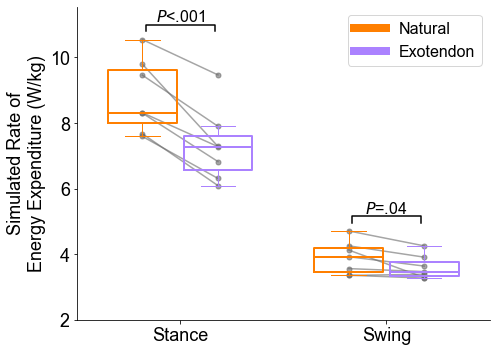

In [27]:
print("!!! Need to change this to only get the one leg and not the double !!!\n\n We really are only showing the results of one leg")

swings = [swingnatural, swingexo]
stances = [stancenatural, stanceexo]


# pdb.set_trace()
fig = figure(figsize=(7,5))
ax = axes()
#hold(True)

boxprops = dict(linewidth=2)
medianprops = dict(linewidth=2)
meanprops = dict(linewidth=2)
# flierprops = dict(linewidth=2)


# first pair - stance
bp = boxplot(stances, positions=[0.95,2.05], widths=1, zorder=100, 
             boxprops=boxprops, 
             meanprops=meanprops, 
             medianprops=medianprops,
             showfliers=False)
#             flierprops=flierprops)
setBoxColors(bp)
# second pair - swing
bp = boxplot(swings, positions=[3.95,5.05], widths=1, zorder=105,
            boxprops=boxprops, 
             meanprops=meanprops, 
             medianprops=medianprops,
             showfliers = False)
#             flierprops=flierprops)
setBoxColors(bp)
# set axes limits and labels
xlim(0,6)
ylim(2,np.max(stances_natural)['metabolics_stance_avg_mean']+1)


ax.set_xticks([1.5, 4.5])
# ax.set_xticklabels(['Stance\n{}% Avg. Difference', 'Swing\n{}% Avg. Difference'.format(stance_perc_change,swing_perc_change)],fontsize=24)
ax.set_xticklabels(['Stance', 'Swing'],fontsize=18, fontname='Arial')
# ax.yticks(fontsize=24)
# draw temporary red and blue lines and use them to create a legend
hB, = plot([1,1],'-',color=colorlight, lw=8)
hR, = plot([1,1],'-',color=colordark, lw=8)
plt.legend((hB, hR),('Natural', 'Exotendon'),fontsize=18, prop = { "family":'Arial', 'size':16 })
plt.ylabel('Simulated Rate of\nEnergy Expenditure (W/kg)',fontsize=18,fontname='Arial')
plt.yticks(fontsize=18,fontname='Arial')
hB.set_visible(False)
hR.set_visible(False)
# plt.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

colorsjit = ['red', 'blue']
for i in [1,2]: # ,4,5]:
    y = stances[i-1] # titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    # x = np.random.normal(i, 0.0, size=len(y))
    x = [.95*np.ones(len(y)), 2.05*np.ones(len(y))]
    plot(x[i-1], y, '.', alpha=0.6, color='dimgrey', zorder=20, markersize=10) # color=colorsjit[i-1])
for i in [4,5]:
    y = swings[i-4]
    # x = np.random.normal(i, 0.0, size=len(y))
    # need a different x value
    x = [3.95*np.ones(len(y)), 5.05*np.ones(len(y))]
    plot(x[i-4], y, '.', alpha=0.6, color='dimgrey', zorder=50, markersize=10) # color=colorsjit[i-4])

# figure out subject lines across conditions
x_stances = [0.95*np.ones(len(stances[0])), 2.05*np.ones(len(stances[1]))]
x_swings = [3.95*np.ones(len(stances[0])), 5.05*np.ones(len(stances[1]))]

plot(x_stances, stances, color='dimgrey', zorder=-100, alpha=0.6)
plot(x_swings, swings, color='dimgrey', zorder=-100, alpha=0.6)

# now figure out the bracket
x1, x2 = 1,2
y, h, col =  np.max(stances_natural)['metabolics_stance_avg_mean']+0.25, 0.2, 'black'
plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], color=col)
plt.text((x1+x2)*.5, y+h, '$\it{P}$<.001', ha='center', va='bottom', color=col,
        fontsize=16, fontname="Arial")

x3, x4 = 4,5
y2, h2, col2 = np.max(swings_natural)['metabolics_swing_avg_mean']+0.25, 0.2, 'black'
plt.plot([x3,x3,x4,x4], [y2, y2+h2, y2+h2, y2], color=col2)
plt.text((x3+x4)*.5, y2+h2, '$\it{P}$=.04', ha='center', va='bottom', color=col2,
        fontsize=16, fontname='Arial')

plt.tight_layout()

fname = os.path.join(repobasedir, '..\\analysis\\figure1_stancevsswing.png')
plt.savefig(fname, dpi=300)

In [17]:
repobasedir
np.max(stances_natural)
print(np.max(stances_natural)['metabolics_stance_avg_mean'])


10.547504473699124


In [18]:
x_stances


[array([0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]),
 array([2.05, 2.05, 2.05, 2.05, 2.05, 2.05, 2.05, 2.05])]

In [19]:
stances

[array([ 7.21730862,  7.59330585,  7.29781652,  8.13502057,  7.40271345,
         8.61880258, 11.18105999, 10.06310853]),
 array([6.27054733, 6.68774088, 6.1681259 , 8.14572704, 7.2072394 ,
        7.34737704, 9.59364044, 7.53589504])]